In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
meta = pd.DataFrame.from_csv('../raw/samples.all.txt', sep='\t')

In [3]:
meta.columns

Index(['ox_code', 'src_code', 'sra_sample_accession', 'population', 'country',
       'region', 'contributor', 'contact', 'year', 'm_s', 'sex', 'n_sequences',
       'mean_coverage', 'latitude', 'longitude', 'kt_2la', 'kt_2rb',
       'kdr_1014', 'rdl_296', 'f_roh_100kb', 'count_roh_100kb',
       'sum_roh_100kb', 'pca_3R_free_pc1', 'pca_3R_free_pc2',
       'pca_3R_free_pc3', 'pca_3R_free_pc4', 'pca_3L_free_pc1',
       'pca_3L_free_pc2', 'pca_3L_free_pc3', 'pca_3L_free_pc4', 'pca_2La_pc1',
       'pca_2La_pc2', 'pca_2La_pc3', 'pca_2La_pc4', 'pca_2Rb_pc1',
       'pca_2Rb_pc2', 'pca_2Rb_pc3', 'pca_2Rb_pc4'],
      dtype='object')

# Non-genomic metadata

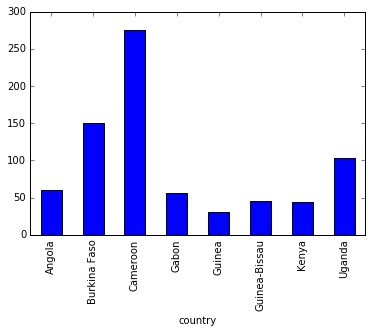

In [4]:
country = meta.groupby('country').size().plot.bar
country()

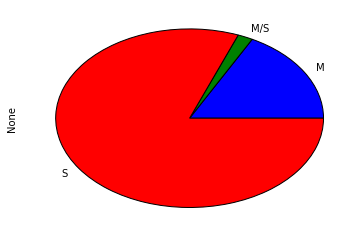

In [32]:
form = meta.groupby(['m_s']).size().plot.pie
form()

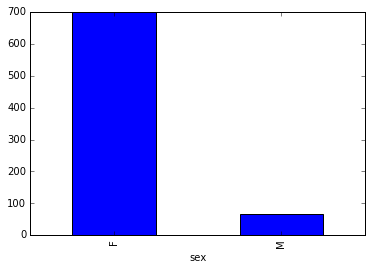

In [6]:
sex = meta.groupby(['sex']).size().plot.bar
sex()

## Genomic metadata

In [7]:
meta['mean_coverage'].describe()

count    765.000000
mean      31.734601
std        9.258979
min       14.210000
25%       27.350000
50%       30.540000
75%       34.340000
max       98.480000
Name: mean_coverage, dtype: float64

In [20]:
a = meta['mean_coverage']
mean_of_mean_coverage = a.mean()

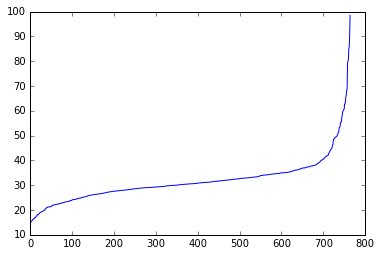

In [8]:
coverage_vals = meta['mean_coverage'].sort_values(inplace=False).values
plt.plot(coverage_vals)

# Better looking plots

In [9]:
print(plt.style.available)

['seaborn-notebook', 'seaborn-darkgrid', 'seaborn-bright', 'classic', 'seaborn-talk', 'seaborn-dark', 'seaborn-ticks', 'seaborn-white', 'seaborn-pastel', 'seaborn-paper', 'seaborn-muted', 'fivethirtyeight', 'grayscale', 'seaborn-poster', 'seaborn-deep', 'bmh', 'seaborn-whitegrid', 'ggplot', 'seaborn-colorblind', 'seaborn-dark-palette', 'dark_background']


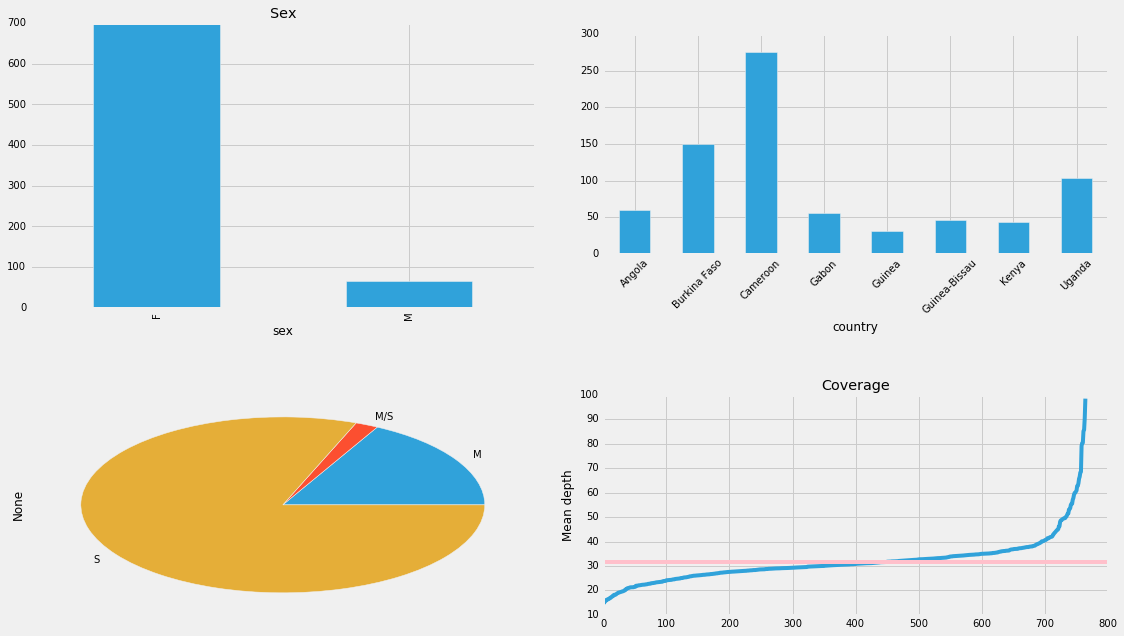

In [25]:
colormap = plt.get_cmap()
print(colormap)
with plt.style.context('fivethirtyeight'):
    fig, axs = plt.subplots(2, 2, squeeze=False, figsize=(16, 9))

    sex(ax=axs[0, 0])
    axs[0,0].set_title ('Sex')
    country(ax=axs[0, 1])
    axs[0, 1].set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    
    form(ax=axs[1,0])

    axs[1,1].plot(coverage_vals)
    axs[1,1].set_ylabel ('Mean depth')
    axs[1,1].set_title('Coverage')
    axs[1,1].axhline(mean_of_mean_coverage, color='pink')
    
    plt.tight_layout()
    bottom_left = axs[1, 0].axes.get_position()
    axs[0,0].axes.set_position([bottom_left.x0, 0.5240926751837101,
                                bottom_left.x1-bottom_left.x0, 0.1 + bottom_left.y1-bottom_left.y0])

## More pandas

In [54]:
meta['region'].groupby(meta['region']).count()

region
Antula                46
Bana                  55
Daiguene              83
Gado-Badzere          70
Kilifi-Junju          13
Kilifi-Mbogolo        31
Koraboh               16
Koundara              15
Libreville            56
Luanda                60
Mayos                101
Nagongera, Tororo    103
Pala                  49
Sourukoudinga         46
Zembe-Borongo         21
Name: region, dtype: int64

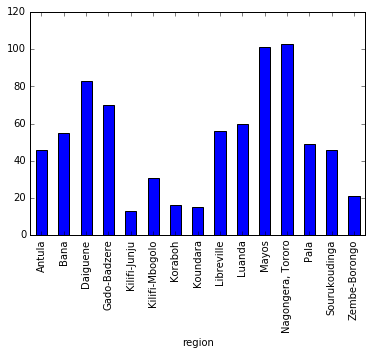

In [58]:
meta['region'].groupby(meta['region']).count().plot.bar()

In [56]:
meta.groupby(meta['region']).count()

,ox_code,src_code,sra_sample_accession,population,country,contributor,contact,year,m_s,sex,...,pca_3L_free_pc3,pca_3L_free_pc4,pca_2La_pc1,pca_2La_pc2,pca_2La_pc3,pca_2La_pc4,pca_2Rb_pc1,pca_2Rb_pc2,pca_2Rb_pc3,pca_2Rb_pc4
region,,,,,,,,,,,,,,,,,,,,,
Antula,46,46,46,46,46,46,0,46,46,46,...,46,46,46,46,46,46,46,46,46,46
Bana,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
Daiguene,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
Gado-Badzere,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
Kilifi-Junju,13,13,13,13,13,13,0,13,13,13,...,13,13,13,13,13,13,13,13,13,13
Kilifi-Mbogolo,31,31,31,31,31,31,0,31,31,31,...,31,31,31,31,31,31,31,31,31,31
Koraboh,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Koundara,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
Libreville,56,56,56,56,56,56,0,56,56,56,...,56,56,56,56,56,56,56,56,56,56


In [60]:
meta[['country', 'region']].groupby([meta['country'], meta['region']]).count()

country  region
country       region                            
Angola        Luanda                  60      60
Burkina Faso  Bana                    55      55
              Pala                    49      49
              Sourukoudinga           46      46
Cameroon      Daiguene                83      83
              Gado-Badzere            70      70
              Mayos                  101     101
              Zembe-Borongo           21      21
Gabon         Libreville              56      56
Guinea        Koraboh                 16      16
              Koundara                15      15
Guinea-Bissau Antula                  46      46
Kenya         Kilifi-Junju            13      13
              Kilifi-Mbogolo          31      31
Uganda        Nagongera, Tororo      103     103

In [33]:
meta

,ox_code,src_code,sra_sample_accession,population,country,region,contributor,contact,year,m_s,...,pca_3L_free_pc3,pca_3L_free_pc4,pca_2La_pc1,pca_2La_pc2,pca_2La_pc3,pca_2La_pc4,pca_2Rb_pc1,pca_2Rb_pc2,pca_2Rb_pc3,pca_2Rb_pc4
index,,,,,,,,,,,,,,,,,,,,,
0,AB0085-C,BF2-4,ERS223996,BFS,Burkina Faso,Pala,Austin Burt,Sam O'Loughlin,2012,S,...,-8.290940,-18.542768,-55.511389,32.682143,-1.833739,-0.381984,-38.934301,31.939383,19.345606,7.362004
1,AB0087-C,BF3-3,ERS224013,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,...,-38.603076,76.915617,-51.856633,27.401249,2.586488,0.643100,-10.072879,29.007266,-21.736087,-30.309562
2,AB0088-C,BF3-5,ERS223991,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,...,-35.553340,73.985488,-50.942456,28.572207,3.072583,-0.643137,12.281744,22.288417,-43.661301,-51.557140
3,AB0089-C,BF3-8,ERS224031,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,...,-36.621568,76.453993,-51.169247,29.414975,2.198434,0.013562,-10.664072,29.601333,-16.831559,-25.452854
4,AB0090-C,BF3-10,ERS223936,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,...,-36.097756,72.036309,-48.607416,26.407532,1.643226,0.102582,12.897113,22.194444,-48.882378,-52.420487
5,AB0091-C,BF3-12,ERS224065,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,...,-35.314955,75.322572,-51.794343,30.469848,2.515906,0.527214,12.159215,22.101785,-44.768666,-53.739392
6,AB0092-C,BF3-13,ERS224043,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,...,-38.757583,76.496541,-52.845560,29.654852,1.297905,0.187415,-11.323792,30.888171,-19.992659,-28.785020
7,AB0094-C,BF3-17,ERS224057,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,...,-35.359032,71.840864,-51.321012,27.868664,2.659006,-0.177080,-7.537867,27.456136,-21.906344,-31.985126
8,AB0095-C,BF4-1,ERS224021,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,...,-37.434072,74.818088,-49.241038,29.178261,2.680864,0.004564,10.314295,22.362536,-46.525785,-52.068364
